< cv2.BFMatcher 0x1431e6b30>
17


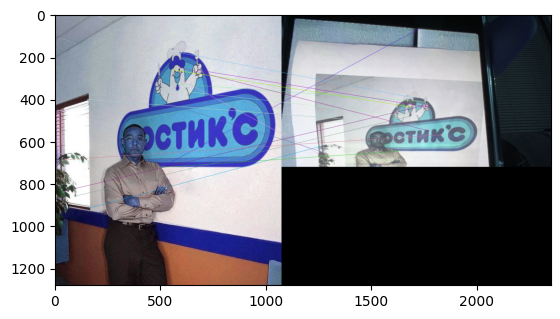

<Figure size 1500x1500 with 0 Axes>

< cv2.BFMatcher 0x143f73fd0>
13


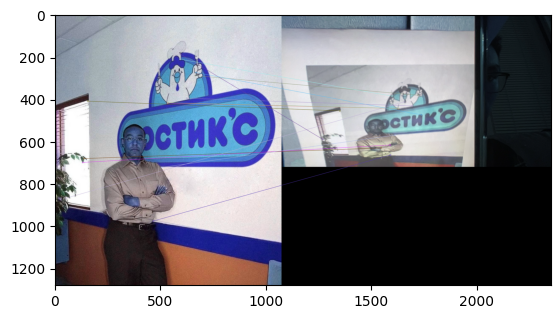

<Figure size 1500x1500 with 0 Axes>

< cv2.BFMatcher 0x143fd20d0>
16


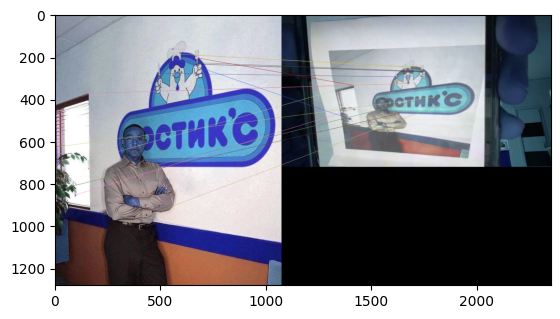

<Figure size 1500x1500 with 0 Axes>

< cv2.BFMatcher 0x143fd2fb0>
10


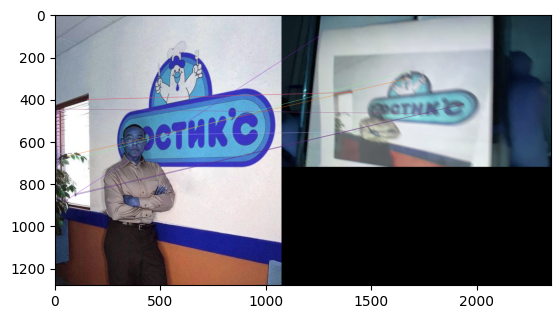

<Figure size 1500x1500 with 0 Axes>

< cv2.BFMatcher 0x1441a0210>
9


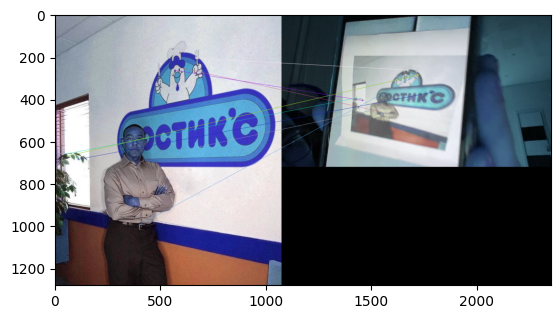

<Figure size 1500x1500 with 0 Axes>

< cv2.BFMatcher 0x16a30b490>
16


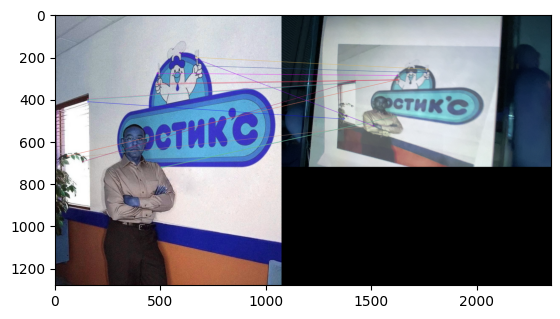

<Figure size 1500x1500 with 0 Axes>

In [ ]:
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt

vid = cv2.VideoCapture(0)
img = cv2.imread('gustavo.jpg')
myVid = cv2.VideoCapture('video-gus.MOV')

success, imgVideo = myVid.read()
h,w,c = img.shape
imgVideo = cv2.resize(imgVideo,(w,h))

orb = cv2.ORB_create(nfeatures = 1000)
keypoint1, descriptor1 = orb.detectAndCompute(img, None)

while True:
    success,imgWebCam = vid.read()
    keypoint2, descriptor2 = orb.detectAndCompute(imgWebCam, None)


    bf = cv2.BFMatcher()
    print(bf)
    matches = bf.knnMatch(descriptor1, descriptor2, k = 2)
    good = []
    for m,n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)
    print(len(good))
    imgFeatures = cv2.drawMatches(img, keypoint1, imgWebCam, keypoint2, good, None, flags = 2 )

    plt.imshow(imgFeatures)
    plt.figure(figsize=(15,15))
    plt.show()

    cv2.imshow('Features', imgFeatures)
#     cv2.imshow('ImgTarget', img)
#     cv2.imshow('WebCam', imgWebCam)
#     cv2.imshow('Video', imgVideo)
    if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    cv2.waitKey(0)
    cv2.destroyAllWindows()


cv2.imshow('ImgTarget', img)
cv2.imshow('webCamVideo', imgVideo)
cv2.waitKey(0)
cv2.destroyAllWindows()